In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats.py")

In [2]:
import numpy as np
from empiricaldist import Pmf
from thinkstats import decorate, two_bar_plots
from scipy.special import comb, factorial
import pandas as pd

In [3]:
def flip(n, p):
    choices = [1, 0]
    probs = [p, 1 - p]
    return np.random.choice(choices, n, p = probs)

In [4]:
flip(25, 0.9)

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1])

In [5]:
seq = flip(1000, 0.9)
pmf = Pmf.from_seq(seq)
pmf

,probs
0,0.091
1,0.909


In [6]:
def simulate_round(n, p):
    seq = flip(n, p)
    return seq.sum()

In [7]:
n = 25
p = 0.9
result_sim = [simulate_round(n,p) for i in range(1000)]

In [8]:
np.mean(result_sim), n * p

(np.float64(22.493), 22.5)

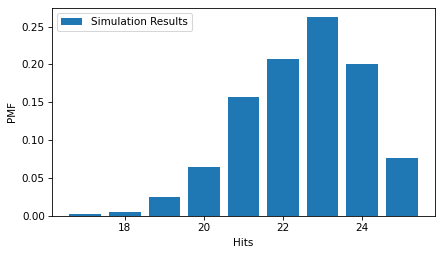

In [9]:
pmf_sim = Pmf.from_seq(result_sim, name = "Simulation Results")
pmf_sim.bar()
decorate(xlabel = "Hits", ylabel = "PMF")

In [10]:
def binomial_pmf(k, n, p):
    return comb(n,k) * (p**k) * ((1-p) ** (n-k))

In [11]:
ks = np.arange(16, n + 1)
ps = binomial_pmf(ks, n, p)
pmf_binom = Pmf(ps, ks, name = "Binomial Model")

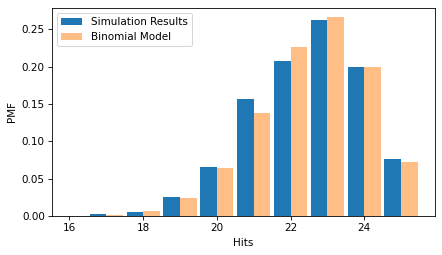

In [12]:
two_bar_plots(pmf_sim, pmf_binom)
decorate(xlabel = "Hits", ylabel = "PMF")

In [13]:
filename = "Shooting_at_the_2020_Summer_Olympics_Mens_skeet"

In [14]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/" + filename)

In [15]:
data = pd.read_html(filename)

In [16]:
df = data[6]
df.head()

,Rank,Athlete,Country,1,2,3,4,5,Total[3],Shoot-off,Notes
0,1,Éric Delaunay,France,25,25,25,24,25,124,+6,"Q, OR"
1,2,Tammaro Cassandro,Italy,24,25,25,25,25,124,+5,"Q, OR"
2,3,Eetu Kallioinen,Finland,25,25,24,25,24,123,NaN,Q
3,4,Vincent Hancock,United States,25,25,25,25,22,122,+8,Q
4,5,Abdullah Al-Rashidi,Kuwait,25,25,24,25,23,122,+7,Q


In [17]:
columns = ["1", "2", "3", "4", "5"]
results = df[columns].values.flatten()

In [18]:
total_shots = 25 * len(results)
total_hits = results.sum()
n, total_shots, total_hits

(25, 3750, np.int64(3575))

In [19]:
p = total_hits / total_shots
p

np.float64(0.9533333333333334)

In [20]:
ps = binomial_pmf(ks, n, p)
pmf_binom = Pmf(ps, ks, name = "Binomial Model")

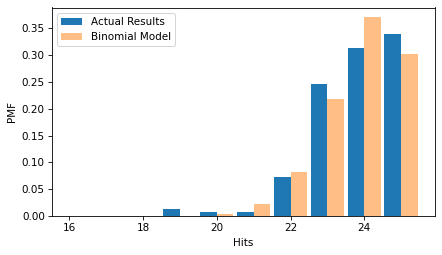

In [21]:
pmf_result = Pmf.from_seq(results, name = "Actual Results")
two_bar_plots(pmf_result, pmf_binom)
decorate(xlabel="Hits", ylabel="PMF")

In [22]:
n = 3600
m = 6
p = m / 3600
p

0.0016666666666666668

In [23]:
def simulate_goals(n,p):
    return flip(n, p).sum()

In [24]:
goals = [simulate_goals(n,p) for i in range(1001)]
np.mean(goals)

np.float64(6.000999000999001)

In [25]:
def poisson_pmf(k,lam):
    return (lam**k) * np.exp(-lam) / factorial(k)

In [26]:
lam = 6
ks = np.arange(20)
ps = poisson_pmf(ks, lam)
pmf_poisson = Pmf(ps, ks, name="Poisson model")

In [27]:
pmf_poisson.normalize()
pmf_poisson.mean()

np.float64(5.999925498375129)

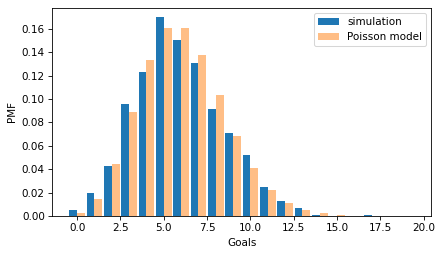

In [28]:
pmf_sim = Pmf.from_seq(goals, name="simulation")

two_bar_plots(pmf_sim, pmf_poisson)
decorate(xlabel="Goals", ylabel="PMF")

In [29]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/nhl_2023_2024.hdf")

In [36]:
filename = "nhl_2023_2024.hdf"

with pd.HDFStore(filename, "r") as store:
    keys = store.keys()

len(keys), keys[0]

(1312, '/202310100PIT')

In [40]:
times = pd.read_hdf(filename, key = keys[0])
times

0     424
1    1916
2    2137
3    3005
4    3329
5    3513
dtype: int64

In [41]:
3600 - times[5]

np.int64(87)

In [42]:
goals = []

for key in keys:
    times = pd.read_hdf(filename, key=key)
    n = len(times)
    goals.append(n)

In [43]:
lam = np.mean(goals)
lam

np.float64(6.0182926829268295)

In [44]:
ps = poisson_pmf(ks, lam)
pmf_poisson = Pmf(ps, ks, name="Poisson model")

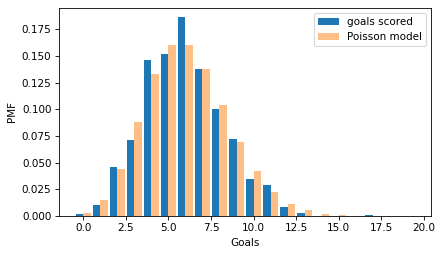

In [45]:
pmf_goals = Pmf.from_seq(goals, name="goals scored")

two_bar_plots(pmf_goals, pmf_poisson)
decorate(xlabel="Goals", ylabel="PMF")